In [1]:
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
adata = sc.read("pancreas_downstream_results_new.h5ad")

In [3]:
cell_types = ["Ngn3 low EP", "Ngn3 High early", "Ngn3 High late", "Fev+ Alpha", "Fev+ Beta", "Fev+ Delta", "Fev+ Epsilon", "Fev+ Pyy", "Alpha", "Beta", "Delta", "Epsilon"]
adata.obs["cell_type_ordered"] = pd.Categorical(adata.obs.celltype, categories=cell_types, ordered=True)

/home/icb/dominik.klein/mambaforge/envs/entot_pip/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/icb/dominik.klein/mambaforge/envs/entot_pip/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


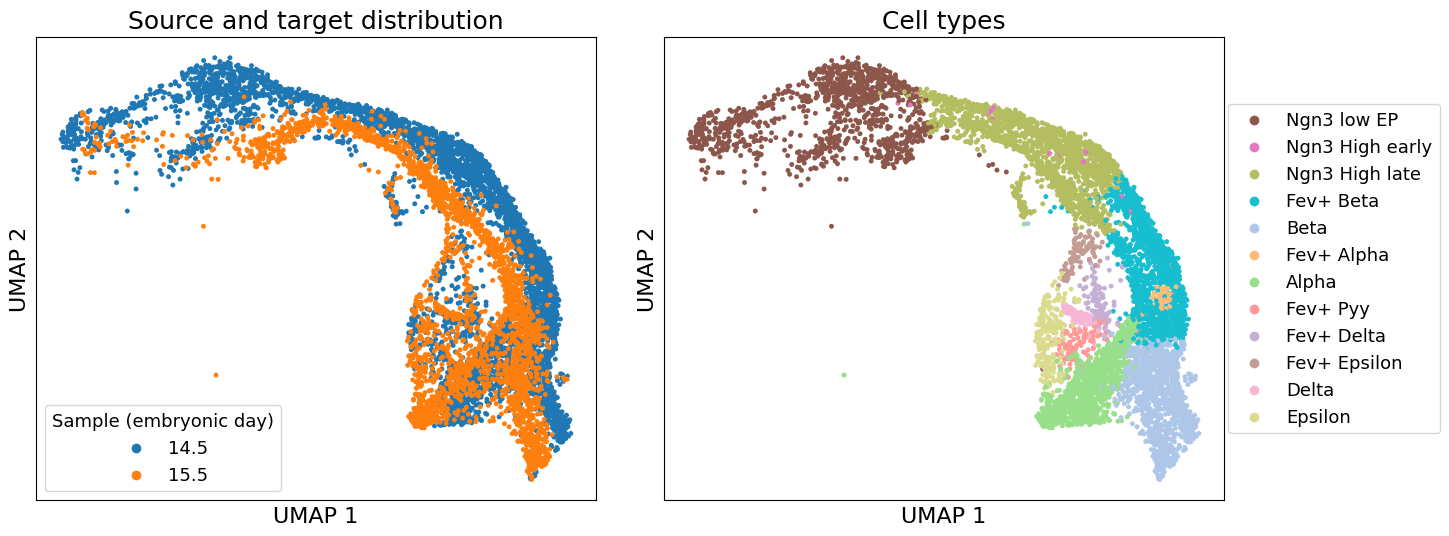

In [4]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
sc.pl.umap(adata, color=["day"], ax=ax1, show=False, size=50)
ax1.legend(title="Sample (embryonic day)", fontsize=13, title_fontsize=13)
ax1.set_title("Source and target distribution", fontsize=18)
ax1.set_xlabel("UMAP 1", fontsize=16)
ax1.set_ylabel("UMAP 2", fontsize=16)
sc.pl.umap(adata, color=["celltype"], ax=ax2, show=False, size=50)
ax2.set_title("Cell types", fontsize=18)
ax2.set_xlabel("UMAP 1", fontsize=16)
ax2.set_ylabel("UMAP 2", fontsize=16)
ax2.legend(fontsize=13, loc='right', bbox_to_anchor=(1.4, 0.5))
plt.tight_layout(pad=3.0)
plt.show()

In [5]:
fig.savefig("pancreas_downstream_supp_new.svg")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/tmp/ipykernel_984600/2773278827.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_yticklabels(g.get_yticklabels(), size = 15)


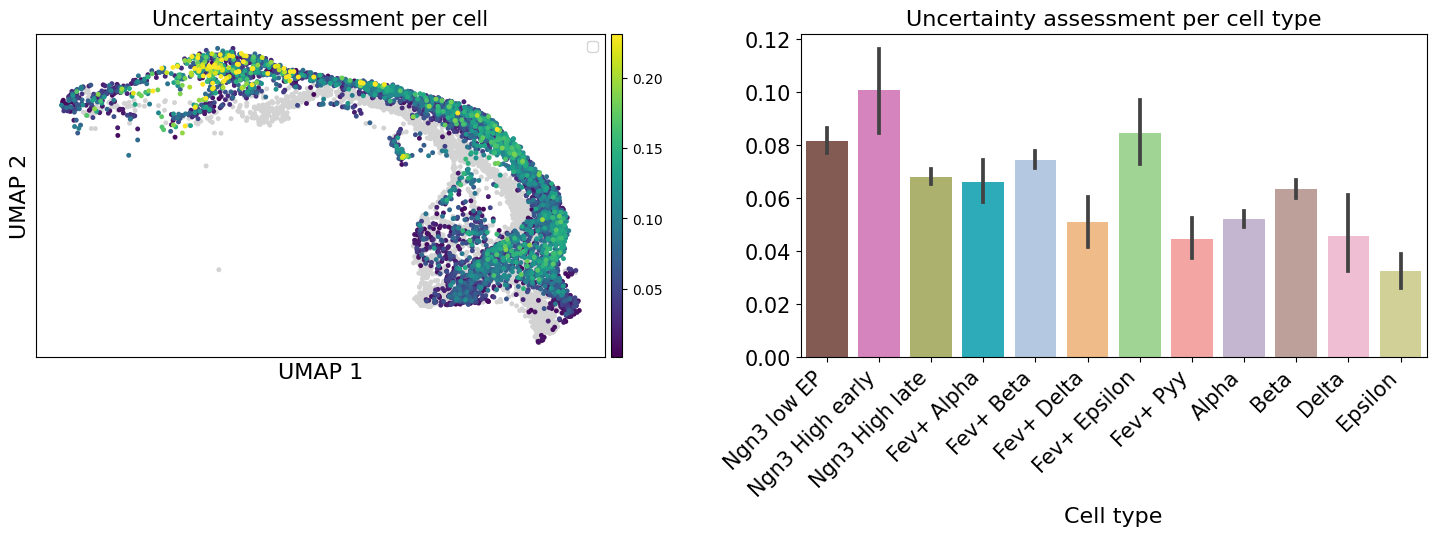

In [6]:
import seaborn as sns

sns.set_palette(palette=adata.uns['celltype_colors'])
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
sc.pl.umap(adata, color=["directional_cosine_sim_variance"], ax=ax1, show=False, vmax="p99", size=50)
ax1.legend()
ax1.set_xlabel("UMAP 1", fontsize=16)
ax1.set_ylabel("UMAP 2", fontsize=16)
ax1.set_title(r"Uncertainty assessment per cell", fontsize=15)

g = sns.barplot(adata.obs, x="cell_type_ordered", y="directional_cosine_sim_variance", ax=ax2)
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')
g.set_title("Uncertainty assessment per cell type", fontsize=16)
#g.set_ylabel(r"$\operatorname{Var}_{\mathbf{y}_1, \mathbf{y}_2 \sim \hat{\pi}_\varepsilon(\cdot | \mathbf{x})})[\operatorname{S}_c(\mathbf{y}_1, \mathbf{y}_2)]$", fontsize=15)
g.set_xlabel("Cell type", fontsize=16)
g.set_ylabel(None)
g.set_xticklabels(g.get_xticklabels(), size = 15)
g.set_yticklabels(g.get_yticklabels(), size = 15)



plt.tight_layout(pad=3.0)
plt.show()

In [7]:
fig.savefig("pancreas_downstream_new.svg")

In [18]:
g.get_xticklabels()

[Text(0, 0, 'Ngn3 low EP'),
 Text(1, 0, 'Ngn3 High early'),
 Text(2, 0, 'Ngn3 High late'),
 Text(3, 0, 'Fev+ Alpha'),
 Text(4, 0, 'Fev+ Beta'),
 Text(5, 0, 'Fev+ Delta'),
 Text(6, 0, 'Fev+ Epsilon'),
 Text(7, 0, 'Fev+ Pyy'),
 Text(8, 0, 'Alpha'),
 Text(9, 0, 'Beta'),
 Text(10, 0, 'Delta'),
 Text(11, 0, 'Epsilon')]